# Load Data

- **TensorFlow datasets package** is used to load the data.
- The Amnesty dataset is imported using the line: `from tensorflow.keras.datasets import mnist`.
- The dataset provides **training data, training labels, test data, and test labels** as separate variables.
- It is recommended to check if a **GPU** is available for use.
- A function using TensorFlow's device library can be used to list available devices, including GPUs.
- The downloaded dataset contains **50,000 training images** and **10,000 test images**.
- If a GPU is not enabled, it can be changed in the notebook settings by switching to hardware acceleration.

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2222737505985323056
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5718933504
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9252224941327025124
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [4]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU availability:", tf.test.is_gpu_available())

if tf.test.is_gpu_available():
    gpu_devices = tf.config.list_physical_devices('GPU')
    
    for device in gpu_devices:
        print("GPU device name:", device.name)
        print("GPU device memory:", tf.config.experimental.get_memory_growth(device))
else:
    print("No GPU devices found.")

TensorFlow version: 2.10.1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU availability: True
GPU device name: /physical_device:GPU:0
GPU device memory: None


# View and inspect data

Inspecting the Data:
- Inspecting the dataset is an essential step to **understand and explore the data**.
- The code provided prints the **shape** and **length** of the training and test datasets, as well as the dimensions of one image sample and the shape of all the training labels.
- The MNIST dataset contains 60,000 training images, each with dimensions of **28x28 pixels in grayscale**.
- The dataset is stored in variables named "train_data," "train_labels," "test_data," and "test_labels" after being loaded.

Visualizing the Data:
- Visualizing the data is important for a **sanity check** and to gain a **better understanding** of the dataset.
- In Keras, visualizing the data is easier as it does not require converting the data into an ideal format.
- Random samples can be accessed using the random function and the length of the training dataset.
- The samples can be visualized using the Matplotlib function and OpenCV to convert the images from **BGR to RGB**.
- The **ground truth labels** can be displayed in the **title** of each image.
- Multiple images can be plotted using subplots and the cell block function.

In [5]:
print(f"Initial Shape of x_train {x_train.shape}")
print(f"Initial Shape of x_test {x_test.shape}")

print(f"Number of samples in training data {len(x_train)}")
print(f"Number of samples in training label {len(y_train)}")
print(f"Number of samples in test data {len(x_test)}")
print(f"Number of samples in test label {len(y_test)}")



Initial Shape of x_train (60000, 28, 28)
Initial Shape of x_test (10000, 28, 28)
Number of samples in training data 60000
Number of samples in training label 60000
Number of samples in test data 10000
Number of samples in test label 10000


<Figure size 640x480 with 0 Axes>

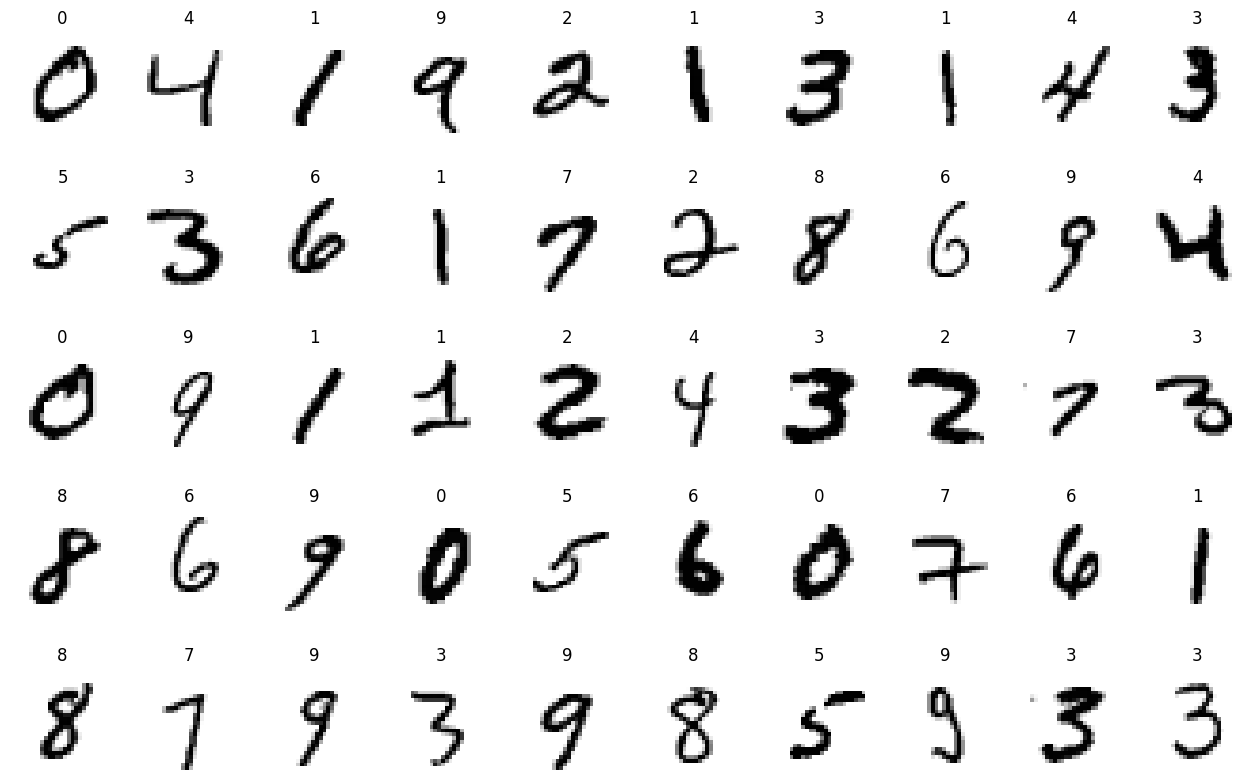

In [6]:
import matplotlib.pyplot as plt

figure = plt.figure()
plt.figure(figsize=(16,10))

num_of_images = 50 

for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index).set_title(f'{y_train[index]}')
    plt.axis('off')
    plt.imshow(x_train[index], cmap='gray_r')

# Preprocess data


Pre-processing the Data:
- Pre-processing the data is necessary to meet the **requirements of Keras models**.
- Keras expects data in a **specific format** and may require additional modifications for proper processing.
- The following pre-processing steps are performed:
  - Adding an **extra dimension** to the data.
  - **Converting the data type** from unsigned integer to float32.
  - **Normalizing** the data between 0 and 1 or -1 and 1 (either can work).
  - Performing **one-hot encoding** for the labels.
- **Reshaping** the data to the desired shape using the reshape function.
- **Converting the data type** to float32 using the astype function.
- **Normalizing** the data by dividing it by a specific value (e.g., 255 or 2).
- **Verifying the final shape** of the data to ensure it matches the desired shape.
- **Applying one-hot encoding** using the to_categorical function to convert labels into a binary format.
- The to_categorical function takes the input labels and the number of classes as parameters.
- The output labels are represented in a one-hot encoded format.
- The pre-processed data is ready to be used for training the model.

Visualizing the Processed Data:
- It's possible to inspect the pre-processed data to verify the changes.
- The first element of the data can be checked to see if it has been successfully transformed.
- The one-hot encoded labels will display the corresponding class for the sample.


In [7]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]


x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

x_train= x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/= 255.0
x_test /= 255.0




print(f"Latter Shape of x_train {x_train.shape}")
print(f"Latter Shape of x_test {x_test.shape}")

Latter Shape of x_train (60000, 28, 28, 1)
Latter Shape of x_test (10000, 28, 28, 1)


In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]


Number of Classes: 10


# Building CNN

- Keras provides convenient building blocks for constructing the model layers.
- The **sequential model** is used to indicate that the layers are connected sequentially.
- The **necessary building blocks are imported** from the layers library and the backend.
- The **stochastic gradient descent optimizer is imported** from the optimizer module.
- The **model is created** using `model = Sequential()`.
- The **layers are added** to the model using `model.add()`.
- The first layer added is a **convolutional layer (`Conv2D`)** with specified parameters such as the **number of filters**, **kernel size**, **activation function** (ReLU), and **input shape**.
- The second layer is another **convolutional layer (`Conv2D`) with 64 filters** and **ReLU activation**.
- A **max pooling layer** (`MaxPooling2D`) follows, which reduces the dimensionality of the feature maps.
- The `Flatten` layer converts the 2D feature maps into a **1D vector**.
- A **dense layer** (`Dense`) with 128 units and ReLU activation is added.
- Finally, a **softmax layer** (`Dense`) with the number of classes (10) and **softmax activation** is added as the output layer.
- The model is **compiled** using `model.compile()` and parameters like **loss function** (categorical cross-entropy), **optimizer** (stochastic gradient descent), and **metrics** (accuracy) are specified.
- The **model summary** can be printed using `model.summary()` to display the architecture and the number of parameters.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import backend as K

In [10]:
model = Sequential()
num_classes = 10

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes,activation='Softmax' )) 

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

# Training the model

Training the CNN Model:
- Training a CNN model in Keras is **relatively simpler** compared to PyTorch.
- After **compiling the model**, training can be initiated using the `model.fit()` function.
- The `model.fit()` function takes the **training data, training labels, batch size, number of epochs**, and other parameters.
- By specifying the `verbose` parameter, you can control the **level of information displayed during training** (0, 1, or 2).
- **Validation data** can be provided as a tuple containing the test data and test labels.
- To **evaluate the model's performance** on the test set, the `model.evaluate()` function can be used with the test labels.
- The output of `model.evaluate()` includes the **test loss and test accuracy scores**.

Observations and Comparisons:
- The training progress is displayed in **real-time**, showing the batch count and the **time taken for each batch**.
- The **total number of batches** is determined by dividing the total data size by the batch size.
- Training in Keras is typically **faster** than the PyTorch equivalent due to differences in implementation.
- The **accuracy achieved during training** may vary compared to PyTorch, which could be influenced by factors such as normalization.
- The training accuracy **gradually increases over epochs**, reaching a high level.
- After training for a certain number of epochs, the model's **accuracy stabilizes**.


In [11]:
batch_size = 128
epochs = 25

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
469/469 [==============================] - 10s 8ms/step - loss: 0.1563 - accuracy: 0.9531 - val_loss: 0.0493 - val_accuracy: 0.9850
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0446 - accuracy: 0.9865 - val_loss: 0.0357 - val_accuracy: 0.9874
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0275 - accuracy: 0.9916 - val_loss: 0.0313 - val_accuracy: 0.9897
Epoch 4/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0193 - accuracy: 0.9937 - val_loss: 0.0363 - val_accuracy: 0.9878
Epoch 5/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.0350 - val_accuracy: 0.9896
Epoch 6/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0110 - accuracy: 0.9964 - val_loss: 0.0383 - val_accuracy: 0.9894
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.0377 - val_accuracy: 0.9901
Epoch

# Plotting the results

Visualization of Loss and Accuracy:
- To visualize the training progress, the `history.history` dictionary can be **accessed after training**.
- The `history.history` dictionary stores the results of metrics such as **accuracy, loss, validation accuracy, and validation loss**.
- By extracting the values from the dictionary, **line plots** can be created using epochs as the x-axis and the metric values as the y-axis.
- The `matplotlib.pyplot` library is used for **plotting the graphs**.
- The training loss and validation loss can be plotted on the same graph to observe their **trends**.
- Similarly, the training accuracy and validation accuracy can be plotted to assess the model's **performance**.
- It is desirable to see both the training and validation loss **decreasing over the epochs**, while the validation accuracy is **higher than the training accuracy**.

Interpreting the Graphs:
- The loss graph shows a significant **decrease** in both training and validation loss after a few epochs.
- A lower loss indicates that the model is **learning and improving** its predictions.
- The accuracy graph demonstrates that the validation accuracy is **higher than the training accuracy**, which indicates that the model is performing well on **unseen data**.



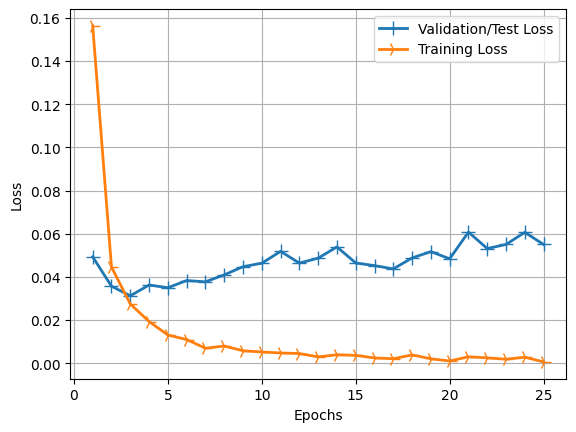

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

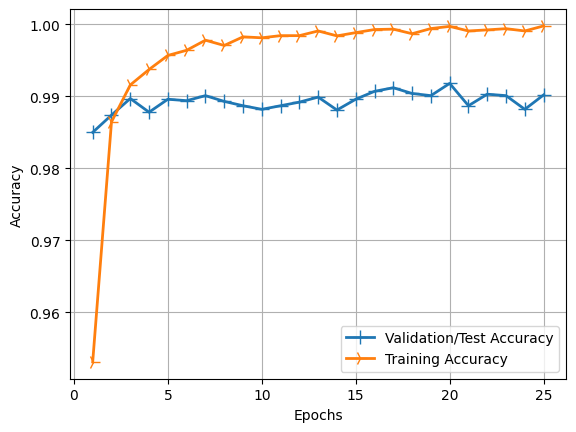

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


# Saving and loading the model

**Save and Load Models:**
- To save a trained model in Keras, the `model.save()` function can be used, specifying the desired name for the saved model.
- The saved model will be in the form of an HDF5 file with a `.h5` extension.
- Loading a saved model is achieved using the `load_model()` function from the `tensorflow.keras.models` module.
- When loading the model, it can be assigned to a new variable for further use, such as `classifier` in this case.

**Making Predictions:**
- Predictions can be made using a loaded model by invoking the `predict()` function on the model object.
- The `predict()` function takes input samples as its argument and returns the corresponding predictions.
- For classification tasks, the predictions are usually probability values for each class.
- To determine the predicted class, the `numpy.argmax()` function can be used to retrieve the index of the class with the highest probability.

**Visualizing Individual Predictions:**
- Individual test images can be predicted by reshaping the image to match the input shape of the model and using the `predict()` function.
- The predicted class can be obtained by using `numpy.argmax()` on the prediction output.

**Additional Functionality:**
- The provided code includes an example of using OpenCV to create images displaying the original test image along with the predicted class label.
- This code randomly selects 10 images from the test dataset, resizes them, reshapes them, and generates images with the predicted class labels displayed.

In [19]:
model.save("keras_mnist_cnn.h5")

In [23]:
from tensorflow.keras.models import load_model
loaded_model = load_model("keras_mnist_cnn.h5")

In [26]:
import numpy as np
pred = np.argmax(loaded_model.predict(x_test), axis = -1)

313/313 [==============================] - 1s 2ms/step
